# Tomato Plant Classification

In this project, we focus on classifying images of tomato plants into four distinct categories based on their health status. The dataset we are using is from Kaggle and is titled **"Plant Village."** The categories for classification are:

1. **Early Blight**
2. **Late Blight**
3. **Healthy**

### Dataset Overview

The dataset contains images of tomato plants, categorized into different types of conditions. Here’s a brief description of each category:

- **Early Blight**: This is a fungal disease caused by *Alternaria solani*. It typically manifests as dark, sunken lesions on the leaves, stems, and fruits of tomato plants. The disease can spread rapidly and lead to significant crop loss.

- **Late Blight**: Caused by the pathogen *Phytophthora infestans*, late blight results in large, irregularly shaped, water-soaked lesions on the leaves and stems. It can cause the plant to wilt and the fruits to rot.

- **Healthy**: These images show tomato plants that are free from visible diseases or infections. The plants are in good condition, with no signs of blight or other issues.

### Project Goals

1. **Data Preparation**: Preprocess the images for classification, including resizing, normalization, and augmentation if needed.
   
2. **Model Training**: Train a classification model to distinguish between the three categories of tomato plant conditions. Common approaches include Convolutional Neural Networks (CNNs) or pre-trained models with fine-tuning.

3. **Evaluation**: Assess the model’s performance using metrics such as accuracy, precision, recall, and F1-score to determine how well it distinguishes between early blight, late blight, and healthy plants.

4. **Deployment**: Implement the trained model in a user-friendly application where users can upload images of tomato plants to receive predictions about their health status.

### Resources

- [Plant Village Dataset on Kaggle](https://www.kaggle.com/datasets/arjuntejaswi/plant-village)
- [Early Blight Overview](https://example.com)
- [Late Blight Overview](https://example.com)

Feel free to explore the dataset and experiment with various models to achieve the best classification results.



## import library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2 as cv
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets , layers , models
import numpy as np
from collections import Counter


## Data preparation


1. **Load Healthy Tomato Images:**
   - The code loads images of healthy tomatoes from a specified directory (`'data/tomato/Tomato_healthy'`).
   - It reads each image and assigns it a label of `0` (indicating "healthy").
   - The images and labels are stored in lists and then converted to NumPy arrays.
   - The data is split into training and testing sets, with 33% of the data used for testing.

2. **Load Early Blight Tomato Images:**
   - Similarly, the code loads images of tomatoes with early blight from another directory (`'data/tomato/Tomato_Early_blight'`).
   - These images are labeled as `1` (indicating "early blight").
   - The data is processed into training and testing sets, with 20% of the data used for testing.

3. **Load Late Blight Tomato Images:**
   - The code also loads images of tomatoes with late blight from a third directory (`'data/tomato/Tomato_Late_blight'`).
   - These images are labeled as `2` (indicating "late blight").
   - This dataset is split into training and testing sets, with 33% of the data used for testing.

4. **Combine Datasets:**
   - Finally, the code combines all the training and testing data from the three categories into single arrays for both the images and labels.

This combined data can then be used for training and evaluating a deep learning model.

In [2]:
# Tomato_healthy
data_healthy = {"img": [],"label": []}

directory_path = 'data/tomato/Tomato_healthy'

image_files = os.listdir(directory_path)


for file in image_files:
    name = 'data/tomato/Tomato_healthy/'+file
    img = cv.imread(name.lower(),-1)
    data_healthy["img"].append(img)
    data_healthy["label"].append(0)
    
data_img_healthy= np.array(data_healthy['img'])
data_lab_healthy = np.array(data_healthy['label'])


X_train_healthy, X_test_healthy, y_train_healthy, y_test_healthy = train_test_split(data_img_healthy, data_lab_healthy, test_size=0.33, random_state=30)


In [3]:
# Tomato_Early_blight
data_Early_blight = {"img": [],"label": []}

directory_path = 'data/tomato/Tomato_Early_blight'

image_files = os.listdir(directory_path)


for file in image_files:
    name = 'data/tomato/Tomato_Early_blight/'+file
    img = cv.imread(name.lower(),-1)
    data_Early_blight["img"].append(img)
    data_Early_blight["label"].append(1)
    
data_img_Early_blight= np.array(data_Early_blight['img'])
data_lab_Early_blight = np.array(data_Early_blight['label'])


X_train_Early_blight, X_test_Early_blight, y_train_Early_blight, y_test_Early_blight = train_test_split(data_img_Early_blight, data_lab_Early_blight, test_size=0.20, random_state=30)


In [4]:
# Tomato_Late_blight
data_Late_blight = {"img": [],"label": []}

directory_path = 'data/tomato/Tomato_Late_blight'

image_files = os.listdir(directory_path)


for file in image_files:
    name = 'data/tomato/Tomato_Late_blight/'+file
    img = cv.imread(name.lower(),-1)
    data_Late_blight["img"].append(img)
    data_Late_blight["label"].append(2)
    
data_img_Late_blight= np.array(data_Late_blight['img'])
data_lab_Late_blight = np.array(data_Late_blight['label'])


X_train_Late_blight, X_test_Late_blight, y_train_Late_blight, y_test_Late_blight = train_test_split(data_img_Late_blight, data_lab_Late_blight, test_size=0.33, random_state=30)


In [5]:
print(X_train_healthy.shape)
print(X_train_Early_blight.shape)
print(X_train_Late_blight.shape)

(1065, 256, 256, 3)
(800, 256, 256, 3)
(1279, 256, 256, 3)


In [6]:
X_train = np.concatenate((X_train_healthy, X_train_Early_blight,X_train_Late_blight))
X_test = np.concatenate((X_test_healthy, X_test_Early_blight,X_test_Late_blight))

y_train = np.concatenate((y_train_healthy, y_train_Early_blight,y_train_Late_blight))
y_test = np.concatenate((y_test_healthy, y_test_Early_blight,y_test_Late_blight))

In [7]:
print(f"train : {Counter(y_train)}")
print(f"test : {Counter(y_test)}")
print(X_train.shape)


train : Counter({2: 1279, 0: 1065, 1: 800})
test : Counter({2: 630, 0: 526, 1: 200})
(3144, 256, 256, 3)



1. **Class Names:**
   - A list `class_names` is defined to map the numeric labels to their corresponding categories: `'healthy'`, `'Early blight'`, and `'Late blight'`.

2. **Generate Random Indices:**
   - A list of 25 random integers is created, each between `0` and `3144`. These indices will be used to randomly select images from the training set.

3. **Display Images:**
   - A plot with 25 subplots is created, arranged in a 5x5 grid.
   - For each subplot:
     - The axis is turned off (`plt.axis(False)`).
     - The title of the subplot is set to the class name corresponding to the label of the image at the random index.
     - The image from the training set at the random index is displayed using `plt.imshow`.

4. **Show Plot:**
   - The plot is displayed with `plt.show()`, showing a grid of 25 randomly selected images from the training set, each labeled with its class name.

This visualization helps in getting a quick overview of the different classes and examples in the training data.

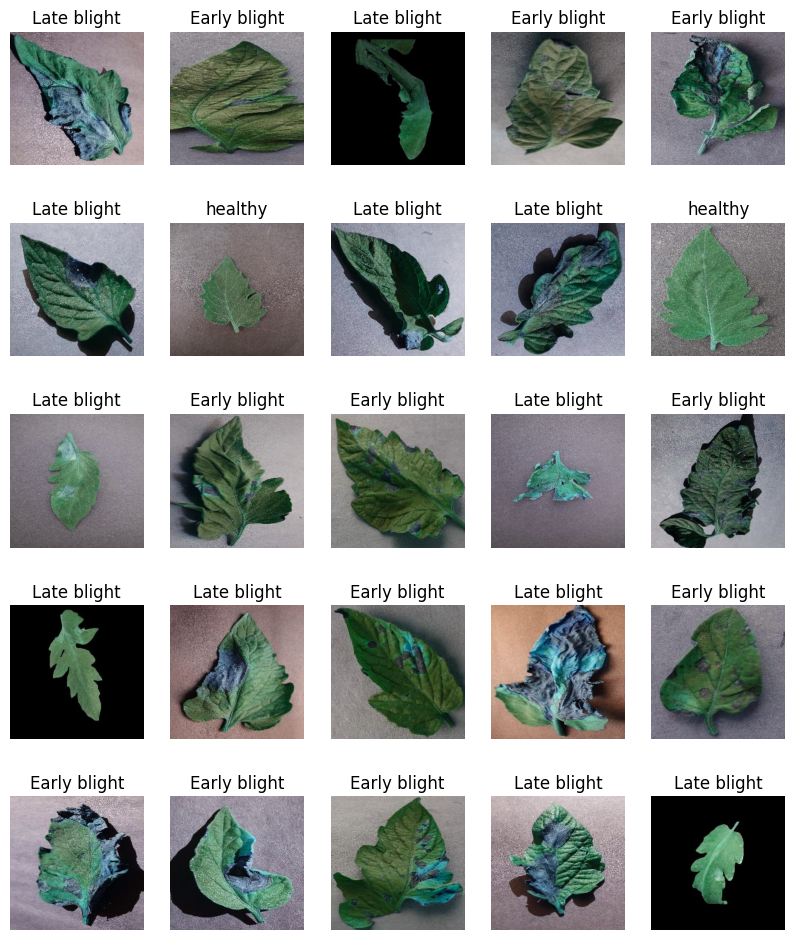

In [8]:
class_names = ['healthy','Early blight','Late blight']
# Générer une liste de 25 éléments aléatoires entre 0 et 4500
random_list = [random.randint(0, 3144) for _ in range(25)]

plt.figure(figsize=(10,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis(False)
    plt.title(class_names[int(y_train[random_list[i]])])
    plt.imshow(X_train[random_list[i]])
    
plt.show()

In [9]:
X_train = X_train/255 
X_test =X_test/255

## Build Model

Here's a simple explanation of the code defining a Convolutional Neural Network (CNN) model using Keras:

1. **Model Initialization:**
   - `models.Sequential()` creates a linear stack of layers to build the neural network.

2. **Add Convolutional Layers:**
   - `Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3))`: Adds a convolutional layer with 64 filters, each of size 3x3, using ReLU activation function. The `input_shape` specifies the shape of the input images (256x256 pixels with 3 color channels).
   - `MaxPooling2D((2, 2))`: Adds a max pooling layer that reduces the spatial dimensions by taking the maximum value in each 2x2 block.

   This pattern of convolution followed by pooling is repeated several times to extract features from the images.

3. **Flatten and Dense Layers:**
   - `Flatten()`: Flattens the 3D output of the last convolutional layer into a 1D vector.
   - `Dense(64, activation='relu')`: Adds a fully connected (dense) layer with 64 units and ReLU activation.
   - `Dense(3, activation="softmax")`: Adds the output layer with 3 units (one for each class) and a softmax activation function to produce probabilities for each class.

4. **Model Summary:**
   - `model.summary()`: Displays the architecture of the model, including the number of parameters in each layer and the total number of parameters.

This model is designed for image classification, with the output layer predicting one of three classes.

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))

d:\github\simple-deep-learning-project\deep\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,504 (584.00 KB)

 Trainable params: 149,504 (584.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,198,339 (4.57 MB)

 Trainable params: 1,198,339 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history= model.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


d:\github\simple-deep-learning-project\deep\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


99/99 ━━━━━━━━━━━━━━━━━━━━ 453s 5s/step - accuracy: 0.4808 - loss: 1.0752 - val_accuracy: 0.4322 - val_loss: 0.9576
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 357s 4s/step - accuracy: 0.4733 - loss: 1.0314 - val_accuracy: 0.4698 - val_loss: 1.0558
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.4834 - loss: 0.9960 - val_accuracy: 0.4469 - val_loss: 1.1762
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.6006 - loss: 0.9021 - val_accuracy: 0.7596 - val_loss: 0.6788
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.6729 - loss: 0.7845 - val_accuracy: 0.7426 - val_loss: 0.6101
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.7110 - loss: 0.6816 - val_accuracy: 0.7308 - val_loss: 0.5707
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.6506 - loss: 0.7628 - val_accuracy: 0.6040 - val_loss: 0.7821
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.6639 - loss: 0.7973 - val_accuracy: 0.7087 - val_loss: 0.

## Model Evaluation


1. **Evaluate the Model:**
   - `model.evaluate(X_test, y_test)`: This function evaluates the performance of the model on the test data (`X_test` and `y_test`). It returns the loss and accuracy metrics for the test set.

2. **Plot Training History:**
   - `plt.plot(history.history['accuracy'], label='accuracy')`: Plots the training accuracy over epochs from the `history` object returned by the model’s `fit` method.
   - `plt.plot(history.history['val_accuracy'], label='val_accuracy')`: Plots the validation accuracy over epochs. Note that there's a typo in your code: `'val_acrruracy'` should be `'val_accuracy'`.

   These plots help visualize how the accuracy of the model improves over training epochs and how well it generalizes to the validation set.

   - `plt.xlabel('Epoch')`: Labels the x-axis as "Epoch".
   - `plt.ylabel('Accuracy')`: Labels the y-axis as "Accuracy".
   - `plt.legend(loc="lower right")`: Adds a legend to the plot indicating which line represents training accuracy and which represents validation accuracy.

These visualizations can help assess whether the model is overfitting or underfitting and provide insights into its training process.

In [16]:
model.evaluate(X_test,y_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 544ms/step - accuracy: 0.9102 - loss: 0.3170


[0.4142965078353882, 0.8348082304000854]

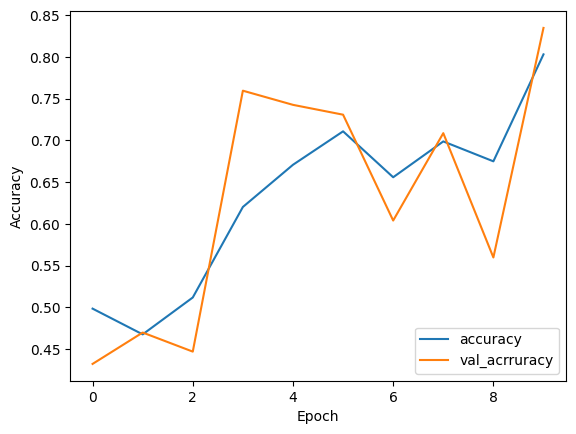

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_acrruracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

## Build Model whit Dropout



1. **Model Initialization:**
   - `models.Sequential()`: Initializes a sequential model where layers are added one after another.

2. **Convolutional Layers with Dropout:**
   - `Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3))`: Adds a convolutional layer with 64 filters of size 3x3, ReLU activation, and padding to keep the spatial dimensions the same. This is the first layer and specifies the input shape.
   - `MaxPooling2D((2, 2))`: Adds a max pooling layer that reduces the spatial dimensions by taking the maximum value in each 2x2 block.
   - `Dropout(0.5)`: Adds a dropout layer with a dropout rate of 0.5. This means 50% of the neurons are randomly dropped during training to prevent overfitting.

   This pattern of convolution followed by pooling and dropout is repeated multiple times.

3. **Flatten and Dense Layers:**
   - `Flatten()`: Flattens the 3D output of the last convolutional layer into a 1D vector.
   - `Dense(64, activation='relu')`: Adds a fully connected (dense) layer with 64 units and ReLU activation.
   - `Dense(3, activation='softmax')`: Adds the output layer with 3 units (one for each class) and a softmax activation function to produce probabilities for each class.

4. **Model Summary:**
   - `model1.summary()`: Displays the architecture of the model, including the number of parameters in each layer and the total number of parameters.

Adding dropout layers helps to prevent overfitting by randomly setting a fraction of input units to zero during training, making the model generalize better to unseen data.

In [18]:
# Convolutional layers with Dropout and MaxPooling

model1 = models.Sequential()
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Dropout(0.5))

# Flatten the output and add Dense layers
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,198,339 (4.57 MB)

 Trainable params: 1,198,339 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history= model1.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 372s 4s/step - accuracy: 0.3587 - loss: 1.1695 - val_accuracy: 0.4395 - val_loss: 1.0947
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.4234 - loss: 1.0139 - val_accuracy: 0.3805 - val_loss: 1.0981
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.5234 - loss: 0.8893 - val_accuracy: 0.4204 - val_loss: 1.0666
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.6180 - loss: 0.8120 - val_accuracy: 0.4535 - val_loss: 1.0835
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.6644 - loss: 0.7074 - val_accuracy: 0.6062 - val_loss: 0.9470
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.6996 - loss: 0.6398 - val_accuracy: 0.5487 - val_loss: 0.9434
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7137 - loss: 0.6146 - val_accuracy: 0.5509 - val_loss: 0.9067
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.7250 - loss: 0.5919 - val_accuracy: 0.4646 - v

## Model Evaluation again

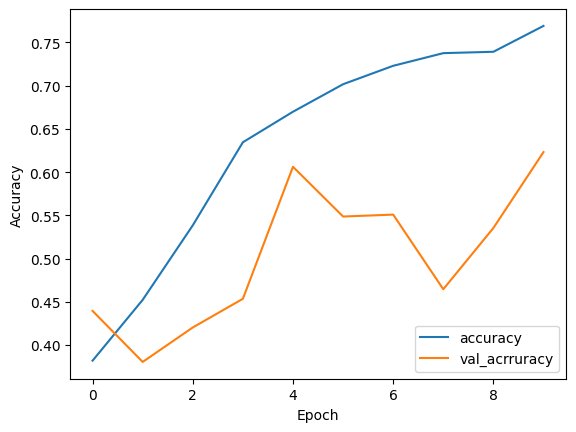

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_acrruracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")



1. **Prepare the Input Image:**
   - `input_img = np.expand_dims(X_test[indice], axis=0)`: Prepares the image for prediction by adding an extra dimension to match the input shape expected by the model (batch size of 1).

2. **Make Predictions:**
   - `predictions = model.predict(input_img)`: Uses the trained model to predict the class probabilities for the input image.

3. **Determine the Predicted Class:**
   - The code iterates over the prediction probabilities for the three classes. It finds the index of the maximum probability, which corresponds to the predicted class.
   - `x` will hold the index of the class with the highest predicted probability.

4. **Visualize the Result:**
   - `plt.figure(figsize=(5,5))`: Creates a plot with a specified size.
   - `plt.imshow(X_test[indice])`: Displays the input image.
   - `plt.title(f"predict: {class_names[x]} | Reality: {class_names[y_test[indice]]}")`: Sets the title of the plot to show the predicted class and the actual class (ground truth) of the image.
   - `plt.axis(False)`: Hides the axes for a cleaner display.

5. **Show the Plot:**
   - `plt.show()`: Displays the plot with the image and title.

6. **Return the Predicted Class:**
   - `return x`: Returns the index of the predicted class.

This function allows you to visualize how well the model performs by comparing its predictions to the actual labels on a given test image.

In [21]:
def predict(indice):
    
    input_img = np.expand_dims(X_test[indice],axis=0)
    predictions = model.predict(input_img)
    x = 0
    for i in range(3):
        if predictions[0][i]>=predictions[0][x] :
            x =i
    
    plt.figure(figsize=(5,5))
    plt.imshow(X_test[indice])
    plt.title(f"pridect :{class_names[x]} | Reality : {class_names[y_test[indice]]}")
    plt.axis(False)
    plt.show()
    return x 
    

In [22]:
def predict1(indice):
    
    input_img = np.expand_dims(X_test[indice],axis=0)
    predictions = model1.predict(input_img)
    x = 0
    for i in range(3):
        if predictions[0][i]>=predictions[0][x] :
            x =i
    
    plt.figure(figsize=(5,5))
    plt.imshow(X_test[indice])
    plt.title(f"pridect :{class_names[x]} | Reality : {class_names[y_test[indice]]}")
    plt.axis(False)
    plt.show()
    return x 
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


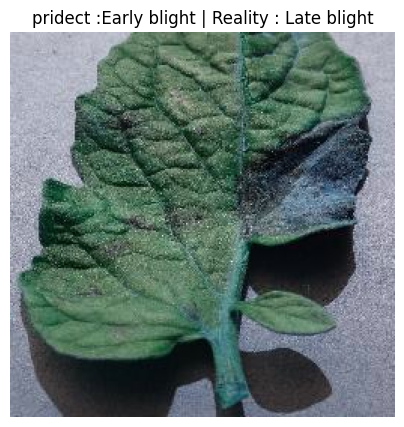

1

In [31]:
predict(970)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


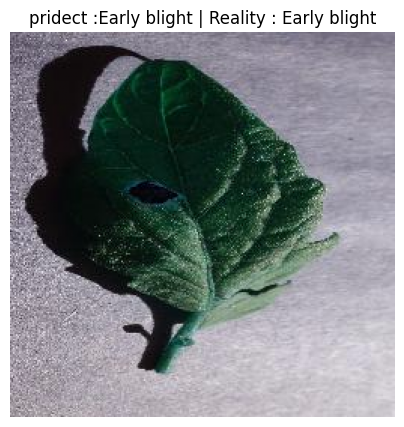

1

In [32]:
predict1(700)
